In [2]:
# Data

import pandas as pd

df = pd.read_csv('Data.csv')  
df.head()


C:\Users\denis\AppData\Local\Temp\ipykernel_15780\2301801102.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data.csv')


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,23,11925,279,2019-01-06,06:52:49,294,2019-01-06,06:58:59
1,M,37,98,103,2019-01-11,14:07:24,254,2019-01-11,14:11:00
2,M,26,10441,174,2019-01-03,10:18:32,27,2019-01-03,10:26:10
3,M,32,9082,176,2019-01-09,08:34:16,19,2019-01-09,08:43:47
4,M,55,10453,45,2019-01-27,08:10:21,256,2019-01-27,08:28:22


In [7]:
df['Tiempo_Retiro'] = pd.to_datetime(df['Fecha_Retiro'] + ' ' + df['Hora_Retiro'])
df['Tiempo_Arribo'] = pd.to_datetime(df['Fecha_Arribo'] + ' ' + df['Hora_Arribo'])

In [8]:
# Duración de los viajes 

df['Duracion'] = (df['Tiempo_Arribo'] - df['Tiempo_Retiro']).dt.total_seconds() / 60
df.head()


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Tiempo_Retiro,Tiempo_Arribo,Duracion
0,M,23,11925,279,2019-01-06,06:52:49,294,2019-01-06,06:58:59,2019-01-06 06:52:49,2019-01-06 06:58:59,6.166667
1,M,37,98,103,2019-01-11,14:07:24,254,2019-01-11,14:11:00,2019-01-11 14:07:24,2019-01-11 14:11:00,3.600000
2,M,26,10441,174,2019-01-03,10:18:32,27,2019-01-03,10:26:10,2019-01-03 10:18:32,2019-01-03 10:26:10,7.633333
3,M,32,9082,176,2019-01-09,08:34:16,19,2019-01-09,08:43:47,2019-01-09 08:34:16,2019-01-09 08:43:47,9.516667
4,M,55,10453,45,2019-01-27,08:10:21,256,2019-01-27,08:28:22,2019-01-27 08:10:21,2019-01-27 08:28:22,18.016667


In [ ]:
df = df.merge(stations, left_on='Ciclo_Estacion_Retiro', right_on='id', how='left')
df.rename(columns={'name': 'Nombre_Estacion_Retiro'}, inplace=True)
df.drop('id', axis=1, inplace=True)

In [22]:
# Tiempo promedio por estación
promedio_viaje_por_estacion = df.groupby('Nombre_Estacion_Retiro')['Duracion'].mean().sort_values(ascending=False)
print(promedio_viaje_por_estacion)

Nombre_Estacion_Retiro
244 MIGUEL DE CERVANTES SAAVEDRA-LAGO VICTORIA     400.173102
232 TAINE-RUBEN DARÍO                              251.539968
116 LONDRES-ROMA                                    45.103446
431 BRUNO TRAVEN-PAZ MONTES DE OCA                  32.256594
113 GENERAL PRIM-VERSALLES                          31.693141
                                                      ...    
383 LUIS CARACCI-2DA. LUIS CARACCI                  11.439022
394 DR. ROBERTO GAYOL-FELIX CUEVAS                  11.412301
77 CHOAPAN-TAMAULIPAS                               11.159381
148 COAHUILA-AV.CUAUHTEMOC                          10.922915
156 TEPIC-AMENALCO                                  10.323333
Name: Duracion, Length: 480, dtype: float64


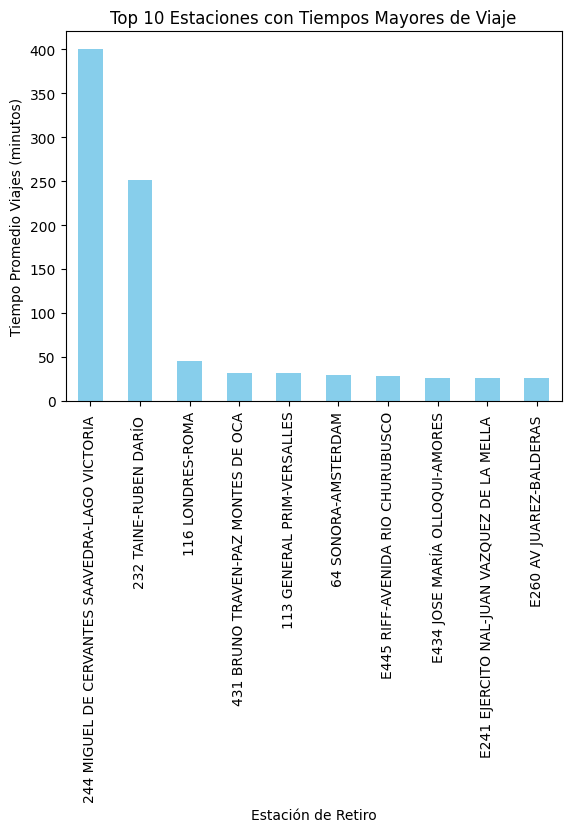

In [23]:
# Visualizar 
import matplotlib.pyplot as plt

promedio_viaje_por_estacion.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Estaciones con Tiempos Mayores de Viaje')
plt.xlabel('Estación de Retiro')
plt.ylabel('Tiempo Promedio Viajes (minutos)')
plt.show()